# Data description

 This data was extracted from OLX Website. The prediction task is to determine the price of a Car.

# Features Description
### 1.Categorical Attributes
 - Links: Url of the specific product
 - State: State of the car registered
   - India, Maharashtra, Tamil Nadu, Kerala, Uttar Pradesh, Delhi
 - Brand: Brand Name and model name of the car
 - Fuel:  Fuely type of the car
   - Disel, Petrol, CNG, LPG, Hybrid
 - Car Type: car variant or transmission type
   - Manual, Automatic
 - Owner: number of owners of the car
 - Location: location of the car rigistered
 - Posting Date: ad posting date
### 2.Continuous Attributes
 - Price: Price of the car
 - Distance: Distance covered by the car

# Objective of this project
The goal of this project is to predict the price of a Car based on the given attributes

# Fetching Data:
## Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
rawdata=pd.read_csv('Olx_carsdata.csv')
rawdata

,urls,State,Price,Brand,Fuel,Distance,Car Type,Owner,Location,Posting Date,a,b,c
0,https://www.olx.in/item/volkswagen-polo-15-tdi...,India,"₹ 9,35,000",Volkswagen Polo (2019),DIESEL,19000.0 KM,MANUAL,2nd,"Ernakulam, Kochi",09-MAY-22,NaN,NaN,NaN
1,https://www.olx.in/item/renault-duster-2012-20...,India,"₹ 4,60,000",Renault Duster (2015),DIESEL,81767.0 KM,MANUAL,2nd,"Shakti Vihar, Dehradun",07-MAY-22,NaN,NaN,NaN
2,https://www.olx.in/item/audi-q3-20-tdi-quattro...,India,"₹ 12,50,000",Audi Q3 (2013),DIESEL,160000.0 KM,AUTOMATIC,1st,"Luhar Colony, Kishangarh Ajmer District",21-APR-22,NaN,NaN,NaN
3,https://www.olx.in/item/mitsubishi-lancer-1998...,India,"₹ 1,35,000",Mitsubishi Lancer (1998),DIESEL,180000 KM,MANUAL,Second,"Muthupattinam, Karaikkudi",Tamil Nadu,Insurance Expired,Within 1 year,NaN
4,https://www.olx.in/item/skoda-laura-2009-diese...,India,"₹ 2,75,000",Skoda Laura (2009),DIESEL,"75,800 KM",AUTOMATIC,1st,"Porur, Chennai",10-MAY-22,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,https://www.olx.in/item/hyundai-creta-14-e-plu...,Delhi,"₹ 8,75,000",Hyundai Creta (2017),DIESEL,62000.0 KM,MANUAL,1st,"ITO, Delhi",10-MAY-22,NaN,NaN,NaN
2539,https://www.olx.in/item/honda-city-i-vtec-vx-2...,Delhi,"₹ 13,45,000",Honda City (2021),PETROL,2500.0 KM,AUTOMATIC,1st,"Preet Vihar, Delhi",10-MAY-22,NaN,NaN,NaN
2540,https://www.olx.in/item/maruti-suzuki-swift-dz...,Delhi,"₹ 3,80,000",Maruti Suzuki Swift Dzire (2015),DIESEL,57000.0 KM,MANUAL,1st,"Karol Bagh, Delhi",10-MAY-22,NaN,NaN,NaN
2541,https://www.olx.in/item/toyota-innova-2006-die...,Karnataka,"₹ 3,70,000",Toyota Innova (2006),DIESEL,200000 KM,AUTOMATIC,Second,"Bharat Nagar, Mysuru",Karnataka,Third Party,Within 1 year,NaN


In [3]:
rawdata=rawdata.drop(labels=[2541,2542], axis=0)

In [4]:
rawdata.shape

(2541, 13)

# Data Cleaning

In [5]:
data = rawdata.drop(rawdata.columns[[0,8,9,10,11,12]], axis=1)

In [6]:
data.head(60)

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,India,"₹ 9,35,000",Volkswagen Polo (2019),DIESEL,19000.0 KM,MANUAL,2nd
1,India,"₹ 4,60,000",Renault Duster (2015),DIESEL,81767.0 KM,MANUAL,2nd
2,India,"₹ 12,50,000",Audi Q3 (2013),DIESEL,160000.0 KM,AUTOMATIC,1st
3,India,"₹ 1,35,000",Mitsubishi Lancer (1998),DIESEL,180000 KM,MANUAL,Second
4,India,"₹ 2,75,000",Skoda Laura (2009),DIESEL,"75,800 KM",AUTOMATIC,1st
5,India,"₹ 60,000",Tata Indica V2 (2014),DIESEL,"160,000 KM",MANUAL,3rd
6,India,"₹ 4,50,000",Maruti Suzuki Ignis (2018),PETROL,"97,209 KM",AUTOMATIC,1st
7,India,"₹ 7,50,000",Volkswagen Polo (2018),PETROL,45000.0 KM,AUTOMATIC,1st
8,India,"₹ 1,70,000",Chevrolet Beat (2011),DIESEL,"90,000 KM",MANUAL,2nd
9,India,"₹ 7,50,000",Maruti Suzuki Swift Dzire (2019),DIESEL,0 KM,MANUAL,1st


In [7]:
attrib, counts = np.unique(data['Car Type'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['Car Type'][data['Car Type'] == '--'] = most_freq_attrib 

attrib, counts = np.unique(data['Distance'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['Distance'][data['Distance'] == '-- KM'] = most_freq_attrib

attrib, counts = np.unique(data['Owner'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['Owner'][data['Owner'] == '--'] = most_freq_attrib

attrib, counts = np.unique(data['Fuel'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['Fuel'][data['Fuel'] == '--'] = most_freq_attrib


In [8]:
data.head(60)

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,India,"₹ 9,35,000",Volkswagen Polo (2019),DIESEL,19000.0 KM,MANUAL,2nd
1,India,"₹ 4,60,000",Renault Duster (2015),DIESEL,81767.0 KM,MANUAL,2nd
2,India,"₹ 12,50,000",Audi Q3 (2013),DIESEL,160000.0 KM,AUTOMATIC,1st
3,India,"₹ 1,35,000",Mitsubishi Lancer (1998),DIESEL,180000 KM,MANUAL,Second
4,India,"₹ 2,75,000",Skoda Laura (2009),DIESEL,"75,800 KM",AUTOMATIC,1st
5,India,"₹ 60,000",Tata Indica V2 (2014),DIESEL,"160,000 KM",MANUAL,3rd
6,India,"₹ 4,50,000",Maruti Suzuki Ignis (2018),PETROL,"97,209 KM",AUTOMATIC,1st
7,India,"₹ 7,50,000",Volkswagen Polo (2018),PETROL,45000.0 KM,AUTOMATIC,1st
8,India,"₹ 1,70,000",Chevrolet Beat (2011),DIESEL,"90,000 KM",MANUAL,2nd
9,India,"₹ 7,50,000",Maruti Suzuki Swift Dzire (2019),DIESEL,0 KM,MANUAL,1st


In [9]:
data.shape

(2541, 7)

In [10]:
data['Price']=data['Price'].str.replace('₹','')  # removing ₹ symbol from Price column

In [11]:
data['Price']=data['Price'].str.replace(',','')  # removing , symbol from Price column

In [12]:
data['Distance']=data['Distance'].str.replace('KM','')  # removing KM text from Distance column

In [13]:
data['Distance']=data['Distance'].str.replace(',','')   # removing , text from Distance column

In [14]:
data['State']=data['State'].str.lower()   # converting State column into lower case

In [15]:
data['Fuel']=data['Fuel'].str.lower()     # converting Fuel column into lower case

In [16]:
data['Car Type']=data['Car Type'].str.lower()  # converting Car Type column into lower case

In [17]:
data.head()

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,india,935000,Volkswagen Polo (2019),diesel,19000.0,manual,2nd
1,india,460000,Renault Duster (2015),diesel,81767.0,manual,2nd
2,india,1250000,Audi Q3 (2013),diesel,160000.0,automatic,1st
3,india,135000,Mitsubishi Lancer (1998),diesel,180000,manual,Second
4,india,275000,Skoda Laura (2009),diesel,75800,automatic,1st


In [18]:
data['Owner']=data['Owner'].str.replace('1st','First')

In [19]:
data['Owner']=data['Owner'].str.replace('2nd','Second')

In [20]:
data['Owner']=data['Owner'].str.replace('3rd','Third')

In [21]:
data['Owner']=data['Owner'].str.replace('4th','Fourth')

In [22]:
data['Owner']=data['Owner'].str.replace('4+','Fourth')

In [23]:
data['Owner']=data['Owner'].str.replace('Fourth+','Fourth')

In [24]:
data.head()

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,india,935000,Volkswagen Polo (2019),diesel,19000.0,manual,Second
1,india,460000,Renault Duster (2015),diesel,81767.0,manual,Second
2,india,1250000,Audi Q3 (2013),diesel,160000.0,automatic,First
3,india,135000,Mitsubishi Lancer (1998),diesel,180000,manual,Second
4,india,275000,Skoda Laura (2009),diesel,75800,automatic,First


# Exploratory Data Analysis

In [25]:
data.head(10)

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,india,935000,Volkswagen Polo (2019),diesel,19000.0,manual,Second
1,india,460000,Renault Duster (2015),diesel,81767.0,manual,Second
2,india,1250000,Audi Q3 (2013),diesel,160000.0,automatic,First
3,india,135000,Mitsubishi Lancer (1998),diesel,180000,manual,Second
4,india,275000,Skoda Laura (2009),diesel,75800,automatic,First
5,india,60000,Tata Indica V2 (2014),diesel,160000,manual,Third
6,india,450000,Maruti Suzuki Ignis (2018),petrol,97209,automatic,First
7,india,750000,Volkswagen Polo (2018),petrol,45000.0,automatic,First
8,india,170000,Chevrolet Beat (2011),diesel,90000,manual,Second
9,india,750000,Maruti Suzuki Swift Dzire (2019),diesel,0,manual,First


In [26]:
data['Brand'].value_counts()

Hyundai I10 (2010)            17
Maruti Suzuki Swift (2017)    17
Maruti Suzuki Swift (2014)    15
Toyota Innova (2013)          14
Maruti Suzuki Swift (2020)    14
                              ..
Skoda Fabia (2010)             1
Nissan Micra (2010)            1
Hyundai Santro Xing (2004)     1
Nissan Micra (2013)            1
Hyundai Verna (2021)           1
Name: Brand, Length: 971, dtype: int64

In [27]:
data.dtypes     # checking datatypes of all columns

State       object
Price       object
Brand       object
Fuel        object
Distance    object
Car Type    object
Owner       object
dtype: object

we found that Price and Distance column were in object

need to convert those two columns into Numeric or Float

In [28]:
#data['Price'] = pd.to_numeric(data['Price'])  # Conerting Price column into numeric

In [29]:
data['Price']=data['Price'].astype(float)   # Conerting Price column into float

In [30]:
#data['Distance'] = pd.to_numeric(data['Distance'])  # Conerting Distance column into numeric

In [31]:
data['Distance']=data['Distance'].astype(float)  # Conerting Distance column into float

In [32]:
data.dtypes

State        object
Price       float64
Brand        object
Fuel         object
Distance    float64
Car Type     object
Owner        object
dtype: object

In [33]:
data.isnull().sum()  # Checking for any Missing values in the data
                     # we found no Missing Values

State       0
Price       0
Brand       0
Fuel        0
Distance    0
Car Type    0
Owner       0
dtype: int64

## Summary statistics for numeric attribute 

In [34]:
data.describe()

,Price,Distance
count,2.541000e+03,2541.000000
mean,7.581020e+05,70152.269185
std,1.294808e+06,69494.650793
min,1.500000e+04,0.000000
25%,2.600000e+05,40000.000000
50%,4.500000e+05,63000.000000
75%,7.450000e+05,87000.000000
max,1.850000e+07,999999.000000


In [35]:
data['Price'].median()

450000.0

In [36]:
data['Price'].mean()

758101.9960645415

In [37]:
data['Distance'].median()

63000.0

In [38]:
data['Price'].min()

15000.0

In [39]:
from termcolor import colored

In [40]:
for i in data.columns:
    if data[i].dtype == 'object':
        print()
        print(colored("Categorical Column Characteristics:",'green',attrs=['bold']))
        print(colored("Column Name:",'green'),i)
        print(data[i].unique(), ":", data[i].nunique())
        print(data[i].value_counts())
        print("Mode:",data[i].mode())
    elif data[i].dtype == 'int32' or 'int64' or 'float64':
        print()
        print(colored("Numerical Column Characteristics:",'blue',attrs=['bold']))
        print(colored("Column Name:",'blue'),i)
        print(data[i].describe())
        print(data[i].mode())


Categorical Column Characteristics:
Column Name: State
['india' 'maharashtra' 'tamil nadu' 'kerala' 'uttar pradesh' 'delhi'] : 6
tamil nadu       445
kerala           433
delhi            428
maharashtra      421
uttar pradesh    417
india            397
Name: State, dtype: int64
Mode: 0    tamil nadu
dtype: object

Numerical Column Characteristics:
Column Name: Price
count    2.541000e+03
mean     7.581020e+05
std      1.294808e+06
min      1.500000e+04
25%      2.600000e+05
50%      4.500000e+05
75%      7.450000e+05
max      1.850000e+07
Name: Price, dtype: float64
0    450000.0
dtype: float64

Categorical Column Characteristics:
Column Name: Brand
['Volkswagen Polo (2019)' 'Renault Duster (2015)' 'Audi Q3 (2013)'
 'Mitsubishi Lancer (1998)' 'Skoda Laura (2009)' 'Tata Indica V2 (2014)'
 'Maruti Suzuki Ignis (2018)' 'Volkswagen Polo (2018)'
 'Chevrolet Beat (2011)' 'Maruti Suzuki Swift Dzire (2019)'
 'Mahindra Scorpio (2021)' 'Toyota Innova (2012)'
 'Maruti Suzuki 800 (1999)' 'Ford 

## Summary statistics for categorical attribute

In [41]:
data.describe(include=["O"])

,State,Brand,Fuel,Car Type,Owner
count,2541,2541,2541,2541,2541
unique,6,971,7,2,5
top,tamil nadu,Hyundai I10 (2010),diesel,manual,First
freq,445,17,1253,2047,1655


In [42]:
data['State'].unique()    # Unique values for State column

array(['india', 'maharashtra', 'tamil nadu', 'kerala', 'uttar pradesh',
       'delhi'], dtype=object)

In [43]:
data['Fuel'].unique()   # Unique values for Fuel column

array(['diesel', 'petrol', 'cng & hybrids', 'lpg', 'electric', 'cng',
       'petrol/compressed natural gas'], dtype=object)

In [44]:
data['Car Type'].unique()  # Unique values for Car Type column

array(['manual', 'automatic'], dtype=object)

In [45]:
data['Owner'].unique()   # Unique values for Owner column

array(['Second', 'First', 'Third', 'Fourth', 'Fourth+'], dtype=object)

In [46]:
data['Owner'].value_counts()

First      1655
Second      683
Third       154
Fourth       38
Fourth+      11
Name: Owner, dtype: int64

In [47]:
data['Brand'].value_counts()  # value counts for Brand column

Hyundai I10 (2010)            17
Maruti Suzuki Swift (2017)    17
Maruti Suzuki Swift (2014)    15
Toyota Innova (2013)          14
Maruti Suzuki Swift (2020)    14
                              ..
Skoda Fabia (2010)             1
Nissan Micra (2010)            1
Hyundai Santro Xing (2004)     1
Nissan Micra (2013)            1
Hyundai Verna (2021)           1
Name: Brand, Length: 971, dtype: int64

In [48]:
data.columns

Index(['State', 'Price', 'Brand', 'Fuel', 'Distance', 'Car Type', 'Owner'], dtype='object')

# Visuliaziation Analysis

## Correlation Analysis

In [49]:
corr=data.corr()
corr

,Price,Distance
Price,1.000000,-0.129454
Distance,-0.129454,1.000000


<AxesSubplot:>

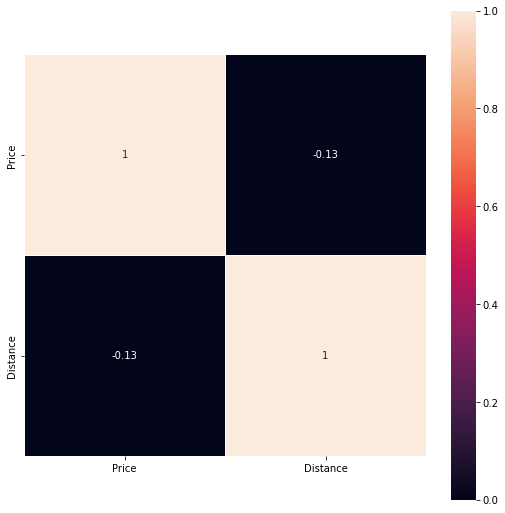

In [50]:
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corr, vmin=0, vmax=1, square=True, annot=True, linewidths=.5)

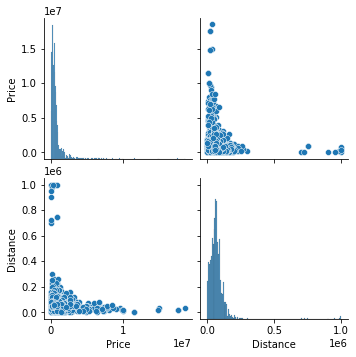

In [51]:
sns.pairplot(data)

# VARIANT ANALYSIS
## 1. Univariate analysis

### Price Column (Target Column) 

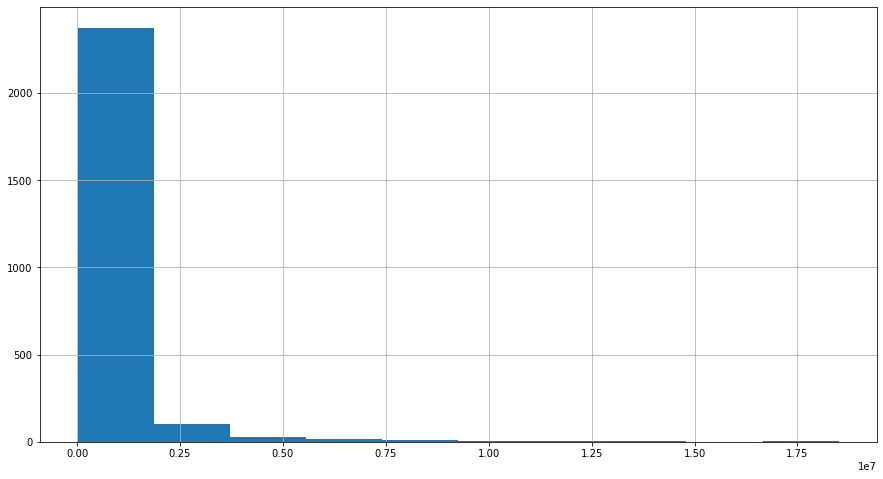

In [52]:
data['Price'].hist(figsize=(15,8))
plt.show()

### Distance column 

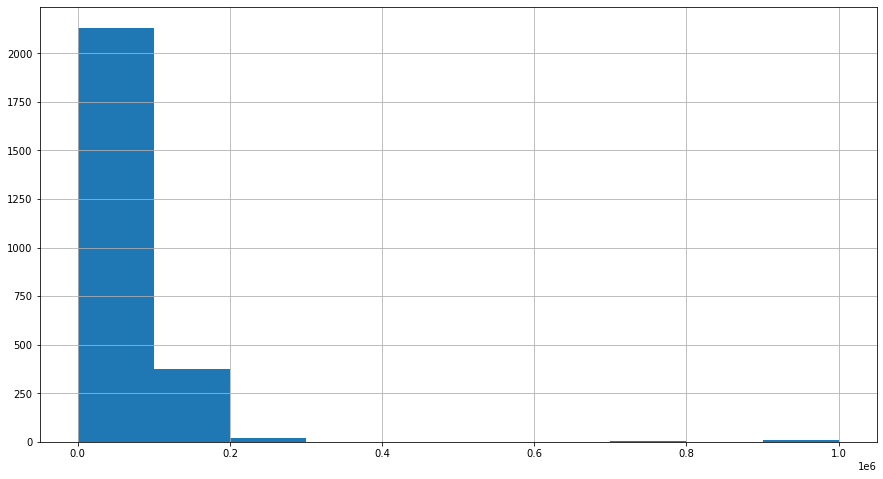

In [53]:
data['Distance'].hist(figsize=(15,8))
plt.show()

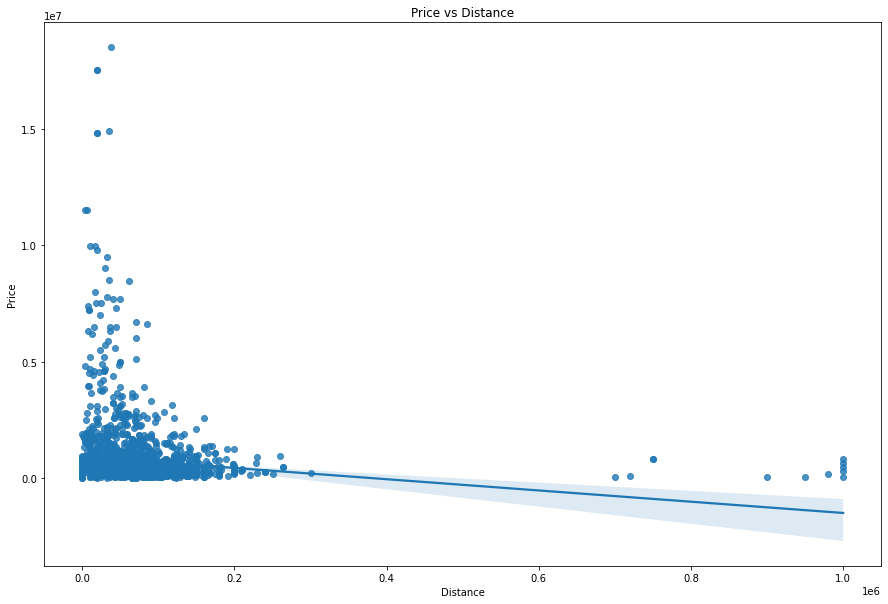

In [54]:
plt.figure(figsize=(15,10))
sns.regplot(x=data.Distance,y=data.Price)
plt.title('Price vs Distance')
plt.show()

### State column  

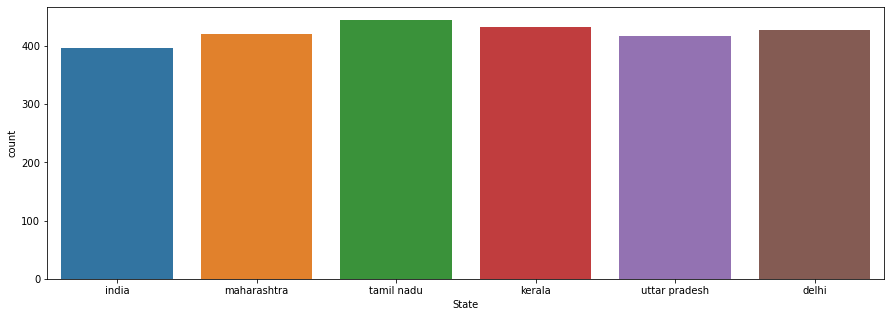

In [55]:
plt.figure(figsize=(15, 5))
sns.countplot(x='State',data=data)
plt.show()

### Fuel column 

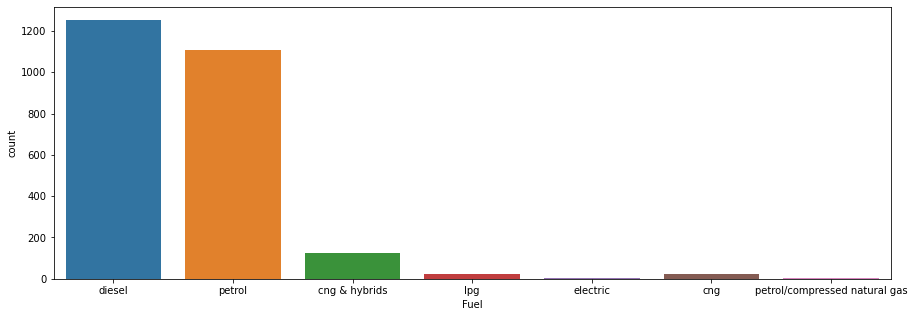

In [56]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Fuel',data=data)
plt.show()

### Car Type column 

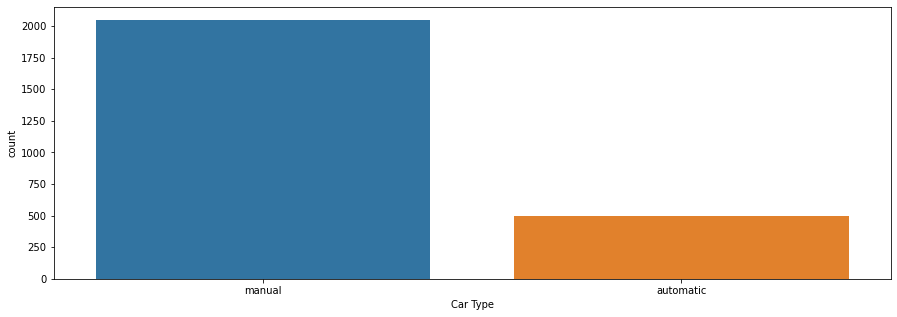

In [57]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Car Type',data=data)
plt.show()

# Bivariant Analysis 

### Distance Column and Price Column

In [58]:
Distance= data[['Distance', 'Price']].groupby(['Distance'], as_index=False).mean()
Distance

,Distance,Price
0,0.0,237428.571429
1,1.0,676251.000000
2,4.0,978350.000000
3,10.0,180000.000000
4,15.0,160000.000000
...,...,...
665,750000.0,850000.000000
666,900000.0,65000.000000
667,950000.0,45000.000000
668,980072.0,200000.000000


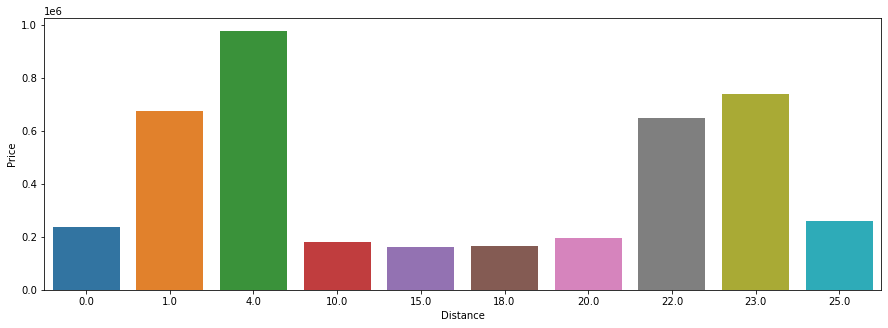

In [59]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Distance', y='Price', data=Distance.head(10))
plt.show()

### State Column and Price Column

In [60]:
State= round(data[['State', 'Price']].groupby(['State'], as_index=False).mean(),2)
State

,State,Price
0,delhi,764093.14
1,india,784485.08
2,kerala,1047349.22
3,maharashtra,763329.48
4,tamil nadu,599996.13
5,uttar pradesh,589934.12


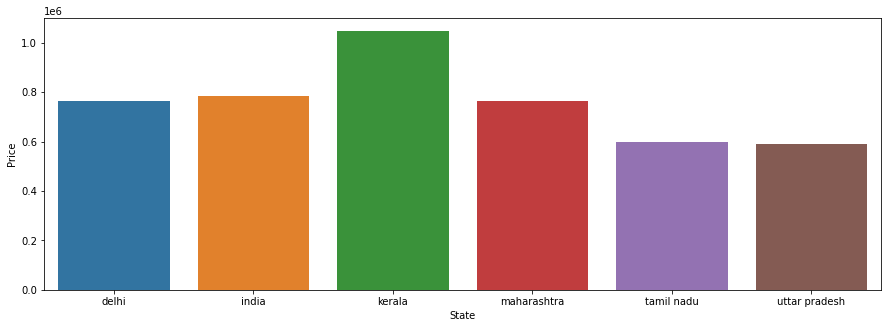

In [61]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State', y='Price', data=State)
plt.show()

### Brand Column and Price Column

In [62]:
Brand_Name=data[['Brand','Price']].groupby(['Brand'], as_index=False).mean().sort_values(ascending=False, by='Price')
Brand_Name

,Brand,Price
772,Rolls-Royce Ghost (2012),18500000.0
935,Toyota Land Cruiser (2017),17500000.0
934,Toyota Land Cruiser (2016),14900000.0
346,Land Rover Range Rover Sport (2019),14800000.0
349,Land Rover Range Rover Velar (2021),11500000.0
...,...,...
199,Honda Others (2016),30000.0
190,Honda Civic (2014),25000.0
865,Tata Tiago (1900),15000.0
141,Hindustan Contessa (2001),15000.0


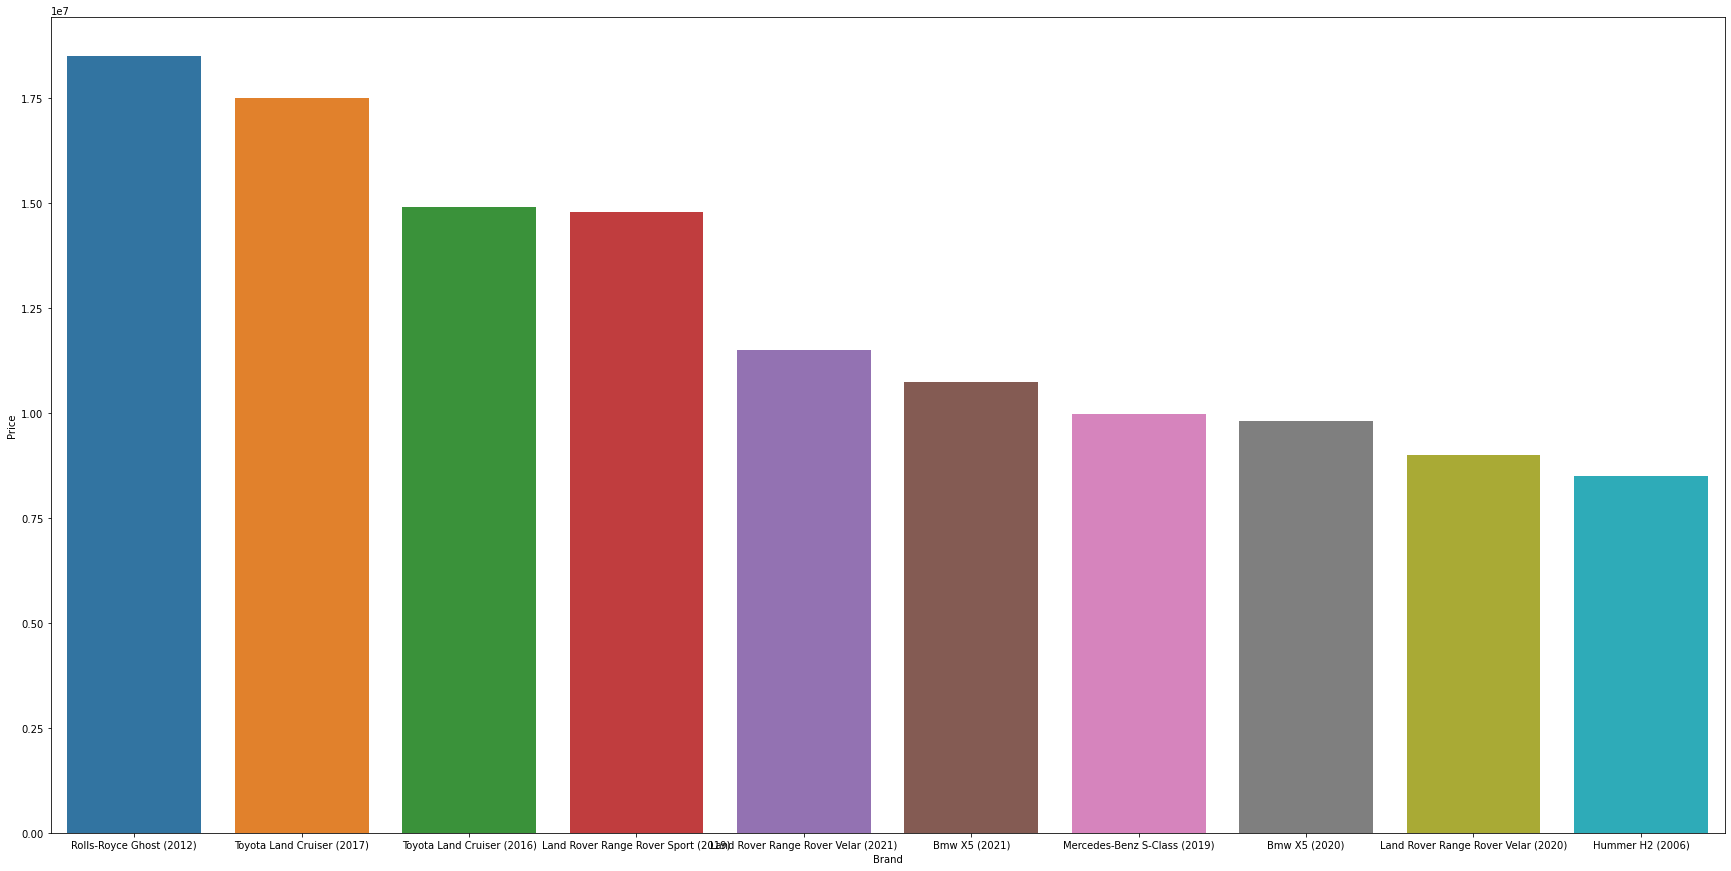

In [63]:
plt.figure(figsize=(30,15))
sns.barplot(x='Brand', y='Price', data=Brand_Name.head(10))
plt.show()

### Fuel Column and Price Column

In [64]:
Fuel= data[['Fuel', 'Price']].groupby(['Fuel'], as_index=False).mean()
Fuel

,Fuel,Price
0,cng,257000.000000
1,cng & hybrids,368749.927419
2,diesel,988936.711093
3,electric,801000.000000
4,lpg,164043.478261
5,petrol,564912.930505
6,petrol/compressed natural gas,537238.750000


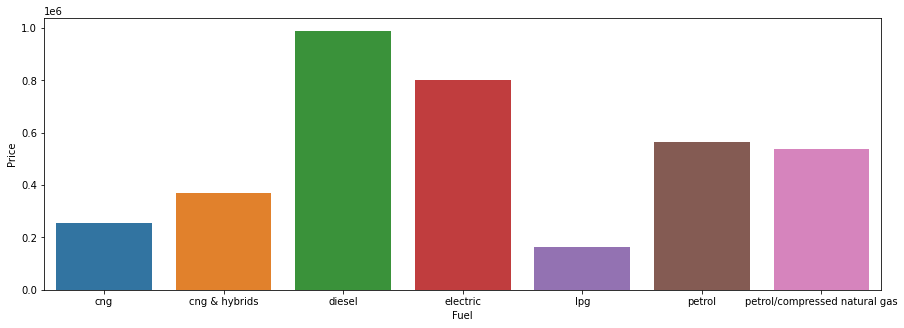

In [65]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Fuel', y='Price', data=Fuel)
plt.show()

### Car Type Column and Price Column

In [66]:
Car_Type= round(data[['Car Type', 'Price']].groupby(['Car Type'], as_index=False).mean(),2)
Car_Type

,Car Type,Price
0,automatic,1902342.09
1,manual,481963.94


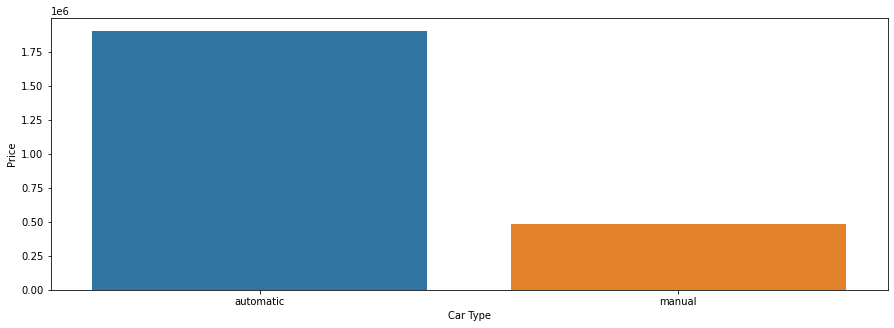

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Car Type', y='Price', data=Car_Type)
plt.show()

### Owner Column and Price Column 

In [68]:
Owner= data[['Owner', 'Price']].groupby(['Owner'], as_index=False).mean()
Owner

,Owner,Price
0,First,892115.436858
1,Fourth,218131.526316
2,Fourth+,216272.727273
3,Second,566765.049780
4,Third,338425.954545


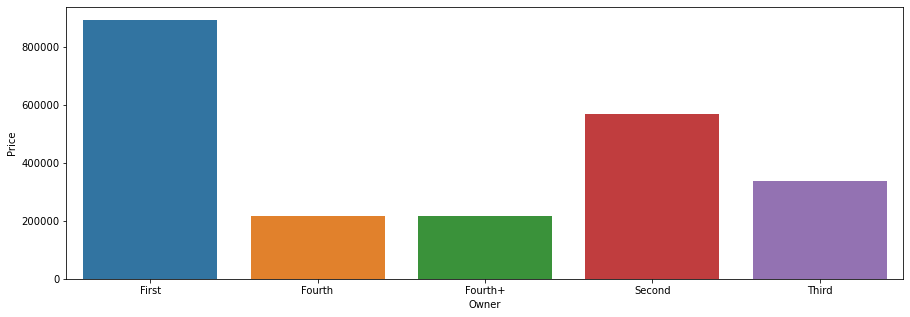

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Owner', y='Price', data=Owner)
plt.show()

## Multivariant Analysis 

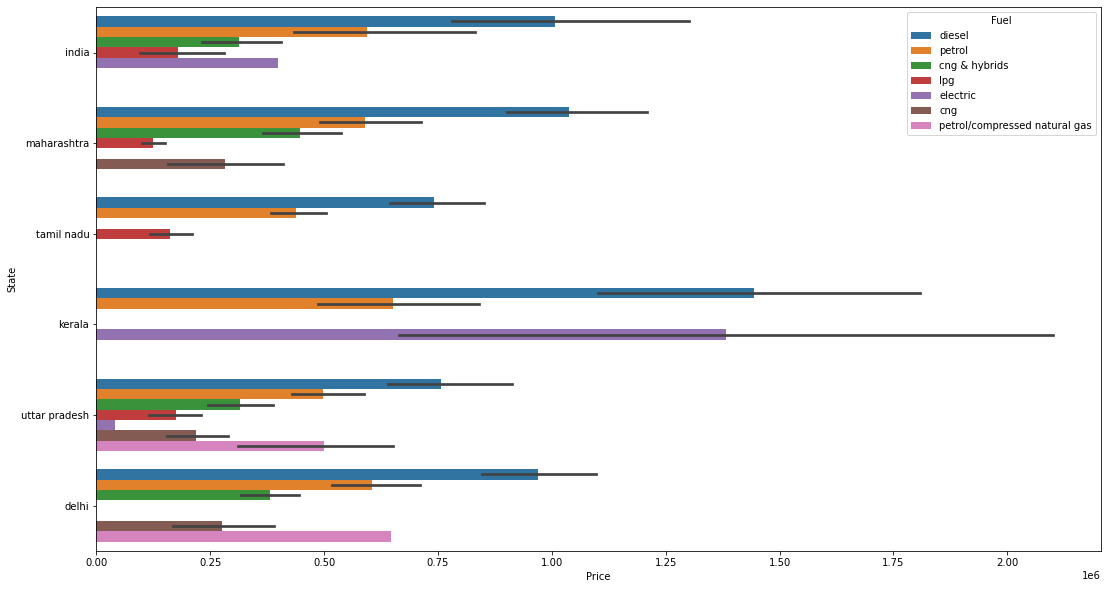

In [70]:
plt.figure(figsize=(18,10))
sns.barplot(x='Price',y ='State', hue='Fuel',data=data)
plt.show()

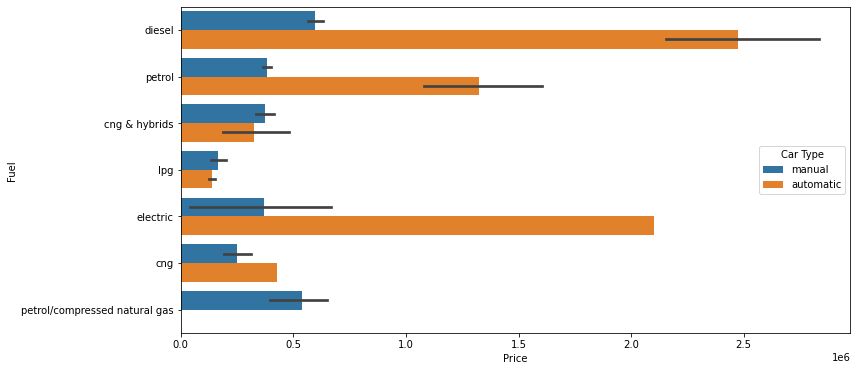

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='Price',y ='Fuel', hue='Car Type',data=data)
plt.show()

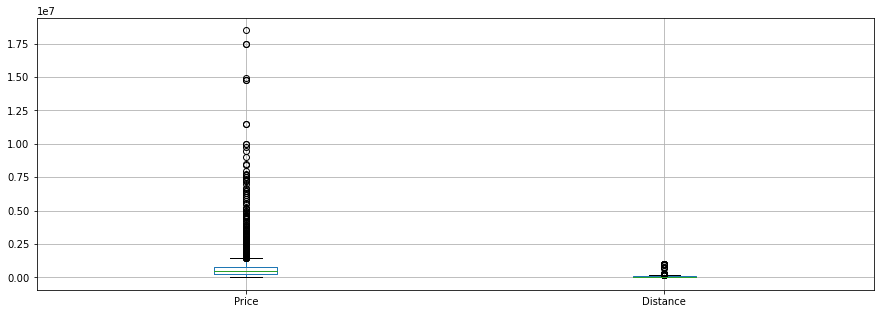

In [72]:
# Handling Outliers
plt.figure(figsize=(15,5))
data.boxplot()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xc57c4d0550>,
 'caps': [<matplotlib.lines.Line2D at 0xc57c33a9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc57c4d0a00>],
 'medians': [<matplotlib.lines.Line2D at 0xc57c33a5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc57c389130>],
 'means': []}

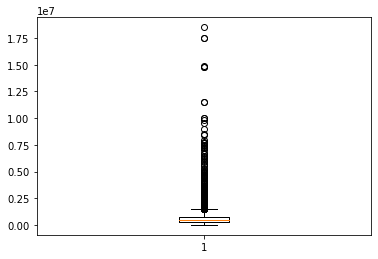

In [73]:
plt.boxplot(data['Price'])  ## finding outliers for Price column

In [74]:
IQR = data.Price.quantile(0.75) - data.Price.quantile(0.25)

lower_value = data.Price.quantile(0.25) - (IQR * 1.5)
upper_value =  data.Price.quantile(0.75) + (IQR * 1.5)

print(lower_value)
print(upper_value)

-467500.0
1472500.0


In [75]:
mean=data['Price'].mean()
mean

758101.9960645415

In [76]:
data["Price"] = np.where(data["Price"]>=1472500.0, mean,data["Price"])
data["Price"] = np.where(data["Price"]<=-467500.0, mean,data["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0xc57c297280>,
 'caps': [<matplotlib.lines.Line2D at 0xc57c2970a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc57c297670>],
 'medians': [<matplotlib.lines.Line2D at 0xc57c29d760>],
 'fliers': [<matplotlib.lines.Line2D at 0xc57c29d190>],
 'means': []}

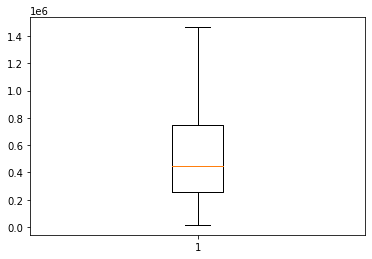

In [77]:
plt.boxplot(data['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0xc57ac35100>,
 'caps': [<matplotlib.lines.Line2D at 0xc57ac28ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc57ac35a00>],
 'medians': [<matplotlib.lines.Line2D at 0xc57ac28340>],
 'fliers': [<matplotlib.lines.Line2D at 0xc57ac1db50>],
 'means': []}

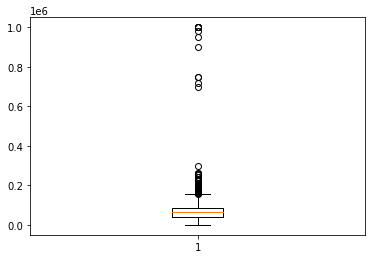

In [78]:
plt.boxplot(data['Distance'])  ## finding outliers for Distance column

In [79]:
IQR = data.Distance.quantile(0.75) - data.Distance.quantile(0.25)

lower_value = data.Distance.quantile(0.25) - (IQR * 1.5)
upper_value =  data.Distance.quantile(0.75) + (IQR * 1.5)

print(lower_value)
print(upper_value)

-30500.0
157500.0


In [80]:
mean=data['Distance'].mean()
mean

70152.2691853601

In [81]:
data["Distance"] = np.where(data["Distance"]>=157500.0, mean,data["Distance"])
data["Distance"] = np.where(data["Distance"]<=-30500.0, mean,data["Distance"])

{'whiskers': [<matplotlib.lines.Line2D at 0xc57aa3c5e0>,
 'caps': [<matplotlib.lines.Line2D at 0xc57aa3c190>,
 'boxes': [<matplotlib.lines.Line2D at 0xc57ad3b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0xc57aa89460>],
 'fliers': [<matplotlib.lines.Line2D at 0xc57aa89eb0>],
 'means': []}

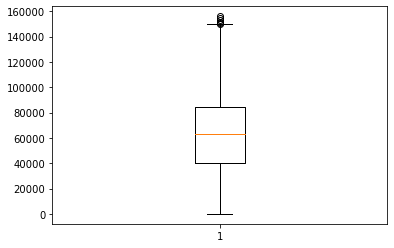

In [82]:
plt.boxplot(data['Distance'])

In [83]:
IQR = data.Distance.quantile(0.75) - data.Distance.quantile(0.25)

lower_value = data.Distance.quantile(0.25) - (IQR * 1.5)
upper_value =  data.Distance.quantile(0.75) + (IQR * 1.5)

print(lower_value)
print(upper_value)

-26000.0
150000.0


In [84]:
mean2=data['Distance'].mean()
mean2

63034.88039086959

In [85]:
data["Distance"] = np.where(data["Distance"]>=150000.0, mean,data["Distance"])
data["Distance"] = np.where(data["Distance"]<=-26000.0, mean,data["Distance"])

{'whiskers': [<matplotlib.lines.Line2D at 0xc57a51b9a0>,
 'caps': [<matplotlib.lines.Line2D at 0xc57aa9e070>,
 'boxes': [<matplotlib.lines.Line2D at 0xc57a51bd30>],
 'medians': [<matplotlib.lines.Line2D at 0xc57aa9efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc57aae86a0>],
 'means': []}

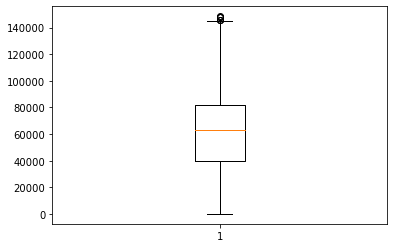

In [86]:
plt.boxplot(data['Distance'])

## SPLITING INTO X and Y

In [87]:
data.head()

,State,Price,Brand,Fuel,Distance,Car Type,Owner
0,india,935000.0,Volkswagen Polo (2019),diesel,19000.000000,manual,Second
1,india,460000.0,Renault Duster (2015),diesel,81767.000000,manual,Second
2,india,1250000.0,Audi Q3 (2013),diesel,70152.269185,automatic,First
3,india,135000.0,Mitsubishi Lancer (1998),diesel,70152.269185,manual,Second
4,india,275000.0,Skoda Laura (2009),diesel,75800.000000,automatic,First


In [88]:
x = data.drop(data.columns[[1]], axis=1)
x

,State,Brand,Fuel,Distance,Car Type,Owner
0,india,Volkswagen Polo (2019),diesel,19000.000000,manual,Second
1,india,Renault Duster (2015),diesel,81767.000000,manual,Second
2,india,Audi Q3 (2013),diesel,70152.269185,automatic,First
3,india,Mitsubishi Lancer (1998),diesel,70152.269185,manual,Second
4,india,Skoda Laura (2009),diesel,75800.000000,automatic,First
...,...,...,...,...,...,...
2536,delhi,Honda City (2015),diesel,54000.000000,manual,First
2537,delhi,Honda City (2018),petrol,54000.000000,manual,First
2538,delhi,Hyundai Creta (2017),diesel,62000.000000,manual,First
2539,delhi,Honda City (2021),petrol,2500.000000,automatic,First


In [89]:
y = data.iloc[:,1]
y

0        935000.0
1        460000.0
2       1250000.0
3        135000.0
4        275000.0
          ...    
2536     445000.0
2537     875000.0
2538     875000.0
2539    1345000.0
2540     380000.0
Name: Price, Length: 2541, dtype: float64

In [90]:
x.columns

Index(['State', 'Brand', 'Fuel', 'Distance', 'Car Type', 'Owner'], dtype='object')

## Label Encoding

In [91]:
x = pd.get_dummies(x, drop_first=True)
x

,Distance,State_india,State_kerala,State_maharashtra,State_tamil nadu,State_uttar pradesh,Brand_Ashok Leyland Others (2012),Brand_Ashok Leyland Others (2015),Brand_Audi A4 (2012),Brand_Audi A4 (2013),...,Fuel_diesel,Fuel_electric,Fuel_lpg,Fuel_petrol,Fuel_petrol/compressed natural gas,Car Type_manual,Owner_Fourth,Owner_Fourth+,Owner_Second,Owner_Third
0,19000.000000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,81767.000000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,70152.269185,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,70152.269185,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,75800.000000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,54000.000000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2537,54000.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2538,62000.000000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2539,2500.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
x.columns.unique()

Index(['Distance', 'State_india', 'State_kerala', 'State_maharashtra',
       'State_tamil nadu', 'State_uttar pradesh',
       'Brand_Ashok Leyland Others (2012)',
       'Brand_Ashok Leyland Others (2015)', 'Brand_Audi A4 (2012)',
       'Brand_Audi A4 (2013)',
       ...
       'Fuel_diesel', 'Fuel_electric', 'Fuel_lpg', 'Fuel_petrol',
       'Fuel_petrol/compressed natural gas', 'Car Type_manual', 'Owner_Fourth',
       'Owner_Fourth+', 'Owner_Second', 'Owner_Third'],
      dtype='object', length=987)

# Clustering

In [93]:
# Importing required libraries
from sklearn.cluster import KMeans

In [94]:
wcss=[] # Within-Cluster-Sum-of-Squares
# Code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)      # method create to screeplot
    kmeans.fit(x)                                                       # applying on dfnorm by using Fit
    wcss.append(kmeans.inertia_)                                          # value 1 to 11 and all the values will be assign

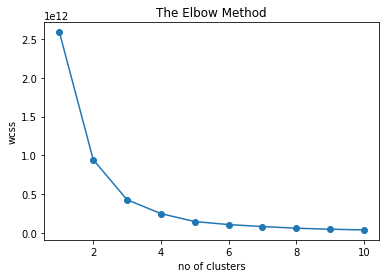

In [95]:
plt.plot(range(1,11), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [96]:
# Fitting K-Means to the dataset
model=KMeans(n_clusters=3)

In [97]:
y_kmeans= model.fit_predict(x) # applying K means in the data

In [98]:
y_kmeans

array([0, 2, 2, ..., 2, 0, 2])

In [99]:
X=np.array(x)

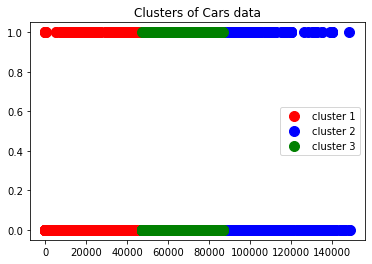

In [100]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label ='cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='cluster 3')

#plt.scatter(X[:, 0], X[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Cars data')
plt.legend()
plt.show()

In [101]:
# adding clustering variable to existing dataset
data['clusters']=pd.Series(y_kmeans)

In [102]:
data

,State,Price,Brand,Fuel,Distance,Car Type,Owner,clusters
0,india,935000.0,Volkswagen Polo (2019),diesel,19000.000000,manual,Second,0
1,india,460000.0,Renault Duster (2015),diesel,81767.000000,manual,Second,2
2,india,1250000.0,Audi Q3 (2013),diesel,70152.269185,automatic,First,2
3,india,135000.0,Mitsubishi Lancer (1998),diesel,70152.269185,manual,Second,2
4,india,275000.0,Skoda Laura (2009),diesel,75800.000000,automatic,First,2
...,...,...,...,...,...,...,...,...
2536,delhi,445000.0,Honda City (2015),diesel,54000.000000,manual,First,2
2537,delhi,875000.0,Honda City (2018),petrol,54000.000000,manual,First,2
2538,delhi,875000.0,Hyundai Creta (2017),diesel,62000.000000,manual,First,2
2539,delhi,1345000.0,Honda City (2021),petrol,2500.000000,automatic,First,0


In [103]:
data.clusters.unique()

array([0, 2, 1])

In [104]:
data['Brand'][data.clusters==0].value_counts

<bound method IndexOpsMixin.value_counts of 0                 Volkswagen Polo (2019)
7                 Volkswagen Polo (2018)
9       Maruti Suzuki Swift Dzire (2019)
10               Mahindra Scorpio (2021)
14      Maruti Suzuki Swift Dzire (2017)
                      ...               
2529              Bmw 3 Series Gt (2016)
2530                  Hyundai I10 (2010)
2531                Hyundai Verna (2021)
2534           Maruti Suzuki Ciaz (2019)
2539                   Honda City (2021)
Name: Brand, Length: 810, dtype: object>

In [105]:
data['Brand'][data.clusters==0].unique()

array(['Volkswagen Polo (2019)', 'Volkswagen Polo (2018)',
       'Maruti Suzuki Swift Dzire (2019)', 'Mahindra Scorpio (2021)',
       'Maruti Suzuki Swift Dzire (2017)', 'Hyundai I10 (2014)',
       'Maruti Suzuki Alto (2011)', 'Maruti Suzuki Swift (2019)',
       'Hyundai Accent (2011)', 'Maruti Suzuki Wagon R (2008)',
       'Mahindra Supro (2021)', 'Maruti Suzuki Swift Dzire (2016)',
       'Mahindra Others (2017)', 'Maruti Suzuki Baleno (2019)',
       'Chevrolet Spark (2011)', 'Renault Kwid (2017)',
       'Tata Tigor (2022)', 'Honda City (2019)',
       'Maruti Suzuki Alto 800 (2015)', 'Mahindra Bolero (2018)',
       'Hyundai Creta (2018)', 'Tata Nano (2014)', 'Tata Tigor (2018)',
       'Maruti Suzuki Swift (2020)', 'Skoda Octavia (2021)',
       'Maruti Suzuki Alto (2020)', 'Mahindra Xuv700 (2022)',
       'Maruti Suzuki Alto 800 (2013)', 'Mahindra Kuv 100 (2016)',
       'Datsun Redigo (2017)', 'Hyundai I20 Active (2015)',
       'Ford Ecosport (2019)', 'Tata Nexon (2018)',

In [106]:
data['Brand'][data.clusters==1].value_counts

<bound method IndexOpsMixin.value_counts of 6         Maruti Suzuki Ignis (2018)
8              Chevrolet Beat (2011)
11              Toyota Innova (2012)
13              Ford Ecosport (2017)
20               Hyundai Getz (2008)
                    ...             
2479              Skoda Fabia (2013)
2480    Maruti Suzuki Celerio (2016)
2485    Mercedes Benz C-Class (2013)
2502            Toyota Innova (2013)
2521            Toyota Innova (2013)
Name: Brand, Length: 536, dtype: object>

In [107]:
data['Brand'][data.clusters==1].unique()

array(['Maruti Suzuki Ignis (2018)', 'Chevrolet Beat (2011)',
       'Toyota Innova (2012)', 'Ford Ecosport (2017)',
       'Hyundai Getz (2008)', 'Maruti Suzuki Wagon R (2010)',
       'Maruti Suzuki Eeco (2012)', 'Mahindra Scorpio (2003)',
       'Toyota Innova (2016)', 'Ashok Leyland Others (2015)',
       'Maruti Suzuki 800 (2007)', 'Hyundai Santro Xing (2007)',
       'Mahindra Bolero (2012)', 'Volkswagen Vento (2011)',
       'Maruti Suzuki Baleno (2018)', 'Toyota Innova (2013)',
       'Maruti Suzuki Wagon R 1.0 (2008)', 'Volkswagen Polo (2013)',
       'Hyundai Getz (2007)', 'Mahindra Kuv 100 (2016)',
       'Hyundai Eon (2012)', 'Hyundai Getz Prime (2007)',
       'Mahindra Jeep (2006)', 'Mahindra Xylo (2011)',
       'Skoda Laura (2013)', 'Skoda Rapid (2013)',
       'Chevrolet Optra (2006)', 'Honda Civic (2006)',
       'Mahindra Xuv500 (2012)', 'Land Rover Range Rover Evoque (2012)',
       'Maruti Suzuki Ertiga (2015)', 'Toyota Innova (2006)',
       'Honda City (2010)', '

In [108]:
data['Brand'][data.clusters==2].value_counts

<bound method IndexOpsMixin.value_counts of 1                  Renault Duster (2015)
2                         Audi Q3 (2013)
3               Mitsubishi Lancer (1998)
4                     Skoda Laura (2009)
5                  Tata Indica V2 (2014)
                      ...               
2535                Hyundai Verna (2013)
2536                   Honda City (2015)
2537                   Honda City (2018)
2538                Hyundai Creta (2017)
2540    Maruti Suzuki Swift Dzire (2015)
Name: Brand, Length: 1195, dtype: object>

In [109]:
data['Brand'][data.clusters==2].unique()

array(['Renault Duster (2015)', 'Audi Q3 (2013)',
       'Mitsubishi Lancer (1998)', 'Skoda Laura (2009)',
       'Tata Indica V2 (2014)', 'Maruti Suzuki 800 (1999)',
       'Audi A4 (2013)', 'Maruti Suzuki Swift (2014)',
       'Ford Figo Aspire (2015)', 'Tata Indigo Ecs (2014)',
       'Toyota Corolla Altis (2010)', 'Maruti Suzuki 800 (2002)',
       'Maruti Suzuki 800 (2009)', 'Maruti Suzuki 800 (2008)',
       'Maruti Suzuki Swift Dzire (2013)', 'Hyundai Creta (2019)',
       'Chevrolet Optra (2007)', 'Hyundai Creta (2015)',
       'Other Brands Others (2012)', 'Mahindra Xuv500 (2013)',
       'Honda City (2011)', 'Mahindra Xuv500 (2018)',
       'Volkswagen Vento (2014)', 'Toyota Innova (2013)',
       'Chevrolet Spark (2013)', 'Toyota Fortuner (2018)',
       'Maruti Suzuki Alto (2009)', 'Maruti Suzuki Swift Dzire (2009)',
       'Mahindra Xylo (2017)', 'Hyundai I20 (2012)', 'Skoda Rapid (2016)',
       'Tata Nano (2016)', 'Volkswagen Tiguan (2018)',
       'Tata Indigo Ecs (2015

In [110]:
data.head()

,State,Price,Brand,Fuel,Distance,Car Type,Owner,clusters
0,india,935000.0,Volkswagen Polo (2019),diesel,19000.000000,manual,Second,0
1,india,460000.0,Renault Duster (2015),diesel,81767.000000,manual,Second,2
2,india,1250000.0,Audi Q3 (2013),diesel,70152.269185,automatic,First,2
3,india,135000.0,Mitsubishi Lancer (1998),diesel,70152.269185,manual,Second,2
4,india,275000.0,Skoda Laura (2009),diesel,75800.000000,automatic,First,2


In [111]:
data.groupby(['clusters']).agg({'Price':'mean'})

,Price
clusters,
0,596093.125212
1,405907.141622
2,468013.520249


In [112]:
data.clusters.value_counts(normalize=True)*100

2    47.028729
0    31.877214
1    21.094057
Name: clusters, dtype: float64

In [113]:
data['clusters']=data['clusters'].replace(0,'high')

In [114]:
data['clusters']=data['clusters'].replace(1,'low')

In [115]:
data['clusters']=data['clusters'].replace(2,'moderate')

In [116]:
data.head()

,State,Price,Brand,Fuel,Distance,Car Type,Owner,clusters
0,india,935000.0,Volkswagen Polo (2019),diesel,19000.000000,manual,Second,high
1,india,460000.0,Renault Duster (2015),diesel,81767.000000,manual,Second,moderate
2,india,1250000.0,Audi Q3 (2013),diesel,70152.269185,automatic,First,moderate
3,india,135000.0,Mitsubishi Lancer (1998),diesel,70152.269185,manual,Second,moderate
4,india,275000.0,Skoda Laura (2009),diesel,75800.000000,automatic,First,moderate


In [117]:
x['clusters']=pd.Series(y_kmeans)

In [118]:
x

,Distance,State_india,State_kerala,State_maharashtra,State_tamil nadu,State_uttar pradesh,Brand_Ashok Leyland Others (2012),Brand_Ashok Leyland Others (2015),Brand_Audi A4 (2012),Brand_Audi A4 (2013),...,Fuel_electric,Fuel_lpg,Fuel_petrol,Fuel_petrol/compressed natural gas,Car Type_manual,Owner_Fourth,Owner_Fourth+,Owner_Second,Owner_Third,clusters
0,19000.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,81767.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
2,70152.269185,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,70152.269185,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
4,75800.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,54000.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2537,54000.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2
2538,62000.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2539,2500.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
#x['clusters']=x['clusters'].replace(0,'moderate')
#x['clusters']=x['clusters'].replace(1,'low')
#x['clusters']=x['clusters'].replace(2,'high')

In [120]:
new_data=pd.concat([y,x],axis=1).reindex(x.index)

In [121]:
new_data

,Price,Distance,State_india,State_kerala,State_maharashtra,State_tamil nadu,State_uttar pradesh,Brand_Ashok Leyland Others (2012),Brand_Ashok Leyland Others (2015),Brand_Audi A4 (2012),...,Fuel_electric,Fuel_lpg,Fuel_petrol,Fuel_petrol/compressed natural gas,Car Type_manual,Owner_Fourth,Owner_Fourth+,Owner_Second,Owner_Third,clusters
0,935000.0,19000.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,460000.0,81767.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
2,1250000.0,70152.269185,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,135000.0,70152.269185,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
4,275000.0,75800.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,445000.0,54000.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2537,875000.0,54000.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2
2538,875000.0,62000.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2539,1345000.0,2500.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Classifiation

## split the data into x and y 

In [122]:
x1=new_data.drop('clusters', axis=1)
x1

,Price,Distance,State_india,State_kerala,State_maharashtra,State_tamil nadu,State_uttar pradesh,Brand_Ashok Leyland Others (2012),Brand_Ashok Leyland Others (2015),Brand_Audi A4 (2012),...,Fuel_diesel,Fuel_electric,Fuel_lpg,Fuel_petrol,Fuel_petrol/compressed natural gas,Car Type_manual,Owner_Fourth,Owner_Fourth+,Owner_Second,Owner_Third
0,935000.0,19000.000000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,460000.0,81767.000000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1250000.0,70152.269185,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,135000.0,70152.269185,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,275000.0,75800.000000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,445000.0,54000.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2537,875000.0,54000.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2538,875000.0,62000.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2539,1345000.0,2500.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
y1=new_data['clusters']
y1

0       0
1       2
2       2
3       2
4       2
       ..
2536    2
2537    2
2538    2
2539    0
2540    2
Name: clusters, Length: 2541, dtype: int32

In [124]:
names=x1.columns
names

Index(['Price', 'Distance', 'State_india', 'State_kerala', 'State_maharashtra',
       'State_tamil nadu', 'State_uttar pradesh',
       'Brand_Ashok Leyland Others (2012)',
       'Brand_Ashok Leyland Others (2015)', 'Brand_Audi A4 (2012)',
       ...
       'Fuel_diesel', 'Fuel_electric', 'Fuel_lpg', 'Fuel_petrol',
       'Fuel_petrol/compressed natural gas', 'Car Type_manual', 'Owner_Fourth',
       'Owner_Fourth+', 'Owner_Second', 'Owner_Third'],
      dtype='object', length=988)

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scale = MinMaxScaler()

In [127]:
x_1 = scale.fit_transform(x1)
x_1

array([[0.63448276, 0.12787724, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30689655, 0.55032306, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85172414, 0.4721515 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.59310345, 0.41728362, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91724138, 0.01682595, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25172414, 0.38363171, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [128]:
x2 = pd.DataFrame(x_1,columns = names)
x2

,Price,Distance,State_india,State_kerala,State_maharashtra,State_tamil nadu,State_uttar pradesh,Brand_Ashok Leyland Others (2012),Brand_Ashok Leyland Others (2015),Brand_Audi A4 (2012),...,Fuel_diesel,Fuel_electric,Fuel_lpg,Fuel_petrol,Fuel_petrol/compressed natural gas,Car Type_manual,Owner_Fourth,Owner_Fourth+,Owner_Second,Owner_Third
0,0.634483,0.127877,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.306897,0.550323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.851724,0.472151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.082759,0.472151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.179310,0.510163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,0.296552,0.363441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2537,0.593103,0.363441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2538,0.593103,0.417284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2539,0.917241,0.016826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## training and testing dataset 

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x2, y1, test_size = 0.2, random_state = 32)

In [131]:
X_train.shape

(2032, 988)

In [132]:
y_train.shape

(2032,)

### LogisticRegression model 

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [134]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [135]:
## Predict test data
y_pred = model.predict(X_test)

In [136]:
y_pred

array([2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0,

In [137]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[152,   0,   9],
       [  0,  93,  13],
       [  5,   3, 234]], dtype=int64)

In [138]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,y_pred)
score1

0.9410609037328095

### Random Forest Classifier 

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
RMclassifier=RandomForestClassifier()

In [141]:
RMclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
y_pred=RMclassifier.predict(X_test)

In [143]:
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[161,   0,   0],
       [  0, 105,   1],
       [  0,   0, 242]], dtype=int64)

In [144]:
score2=accuracy_score(y_test,y_pred)
score2

0.9980353634577603

### SVM (support Vector Machine) 

In [145]:
from sklearn.svm import SVC

In [146]:
SVclassifier=SVC(kernel='linear')

In [147]:
SVclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [148]:
y_pred=SVclassifier.predict(X_test)

In [149]:
cm2=confusion_matrix(y_test, y_pred)
cm2

array([[157,   0,   4],
       [  0, 103,   3],
       [  6,   5, 231]], dtype=int64)

In [150]:
score3=accuracy_score(y_test,y_pred)
score3

0.9646365422396856

### Decision Tree Classifier 

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
DTclassifier=DecisionTreeClassifier(criterion = 'entropy')

In [153]:
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [154]:
y_pred=DTclassifier.predict(X_test)

In [155]:
cm3=confusion_matrix(y_test, y_pred)
cm3

array([[161,   0,   0],
       [  0, 106,   0],
       [  0,   0, 242]], dtype=int64)

In [156]:
score4=accuracy_score(y_test,y_pred)
score4

1.0

### Naive Bayes 

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

In [159]:
y_pred=NBclassifier.predict(X_test)

In [160]:
cm4=confusion_matrix(y_test, y_pred)
cm4

array([[ 80,  64,  17],
       [  9,  83,  14],
       [ 37, 143,  62]], dtype=int64)

In [161]:
score5=accuracy_score(y_test,y_pred)
score5

0.44204322200392926

### K-Nearest Neighbors 

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
KNNclassifier=KNeighborsClassifier(n_neighbors = 10)

In [164]:
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [165]:
y_pred=KNNclassifier.predict(X_test)

In [166]:
cm5=confusion_matrix(y_test, y_pred)
cm5

array([[147,   1,  13],
       [  0,  83,  23],
       [ 18,   9, 215]], dtype=int64)

In [167]:
score6=accuracy_score(y_test,y_pred)
score6

0.8742632612966601

### XGBOOST CLASSIFIER 

In [168]:
from xgboost.sklearn import XGBClassifier

In [169]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

[13:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [170]:
y_pred = classifier.predict(X_test)

In [171]:
cm6=confusion_matrix(y_test, y_pred)
cm6

array([[161,   0,   0],
       [  0, 106,   0],
       [  0,   0, 242]], dtype=int64)

In [172]:
score7=accuracy_score(y_test,y_pred)
score7

1.0

# COMPARING ALL THE MODELS

In [174]:
models=pd.DataFrame({'Model':['LOGISTIC REGRESSION','RANDOMFOREST CLASSIFIER','SUPPORTVECTORMACHINE CLASSIFIER','DECISION TREE CLASSIFIER','NAIVE BAYES CLASSIFIER','K-NEARESTNEIGHBOURS CLASSIFIER', 'XGBOOST CLASSIFIER'],
                     'Accuracy':[score1,score2,score3,score4,score5,score6,score7]
                    })

In [175]:
models

,Model,Accuracy
0,LOGISTIC REGRESSION,0.941061
1,RANDOMFOREST CLASSIFIER,0.998035
2,SUPPORTVECTORMACHINE CLASSIFIER,0.964637
3,DECISION TREE CLASSIFIER,1.000000
4,NAIVE BAYES CLASSIFIER,0.442043
5,K-NEARESTNEIGHBOURS CLASSIFIER,0.874263
6,XGBOOST CLASSIFIER,1.000000


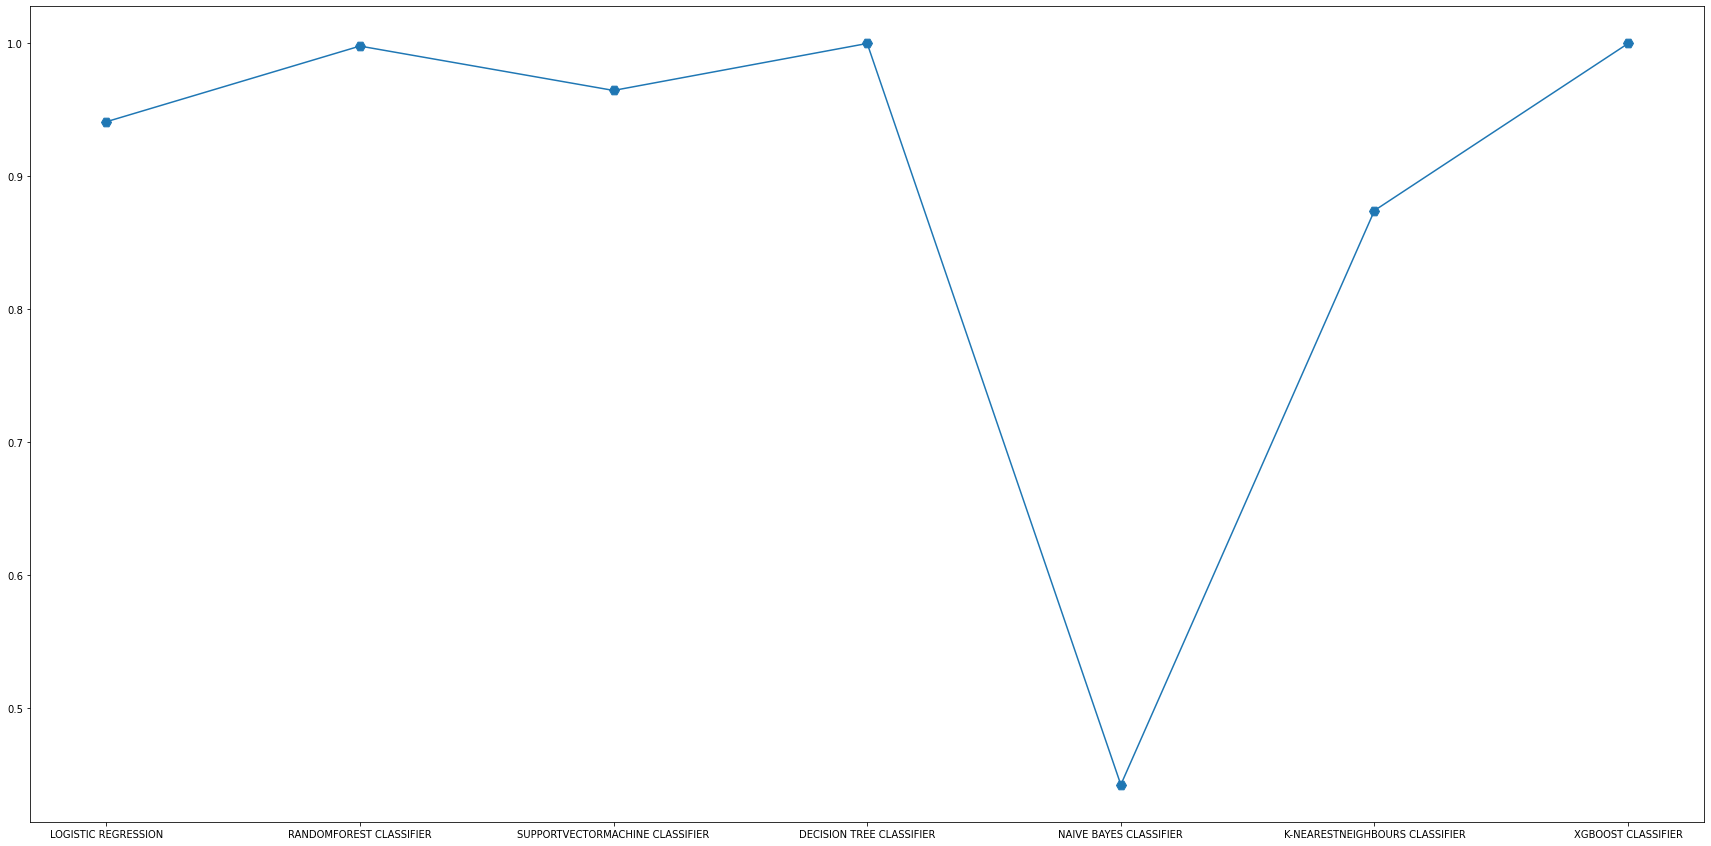

In [176]:
fig = plt.figure(figsize=(30,15))
plt.plot(models['Model'],models['Accuracy'], marker= 'H',ms = 10)
plt.show()

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, x1 , y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()